<a href="https://colab.research.google.com/github/felixlys/Correlation_HeatMap/blob/main/ReviewR_Regresi_n_Heatmap_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Regresi, Korelasi, Heatmap korelasi Data dengan R -Software


In [ ]:

library(tidyverse)
library(readxl)
library(xlsx)
library(nortest)
library(ggpubr)
library(rstatix)
library(car)
library(ggsignif)
library(epitools)
library(factoextra)
library(FactoMineR)
library(plotly)
library(ggplot2)

ERROR: Error in library(xlsx): there is no package called ‘xlsx’


Pertama akan diupload 4 data yang terlampir pada file, antara lain Indikator Kesehatan.xlsx, Life Expectancy Data.csv, data anova.xlsx, dan minuman.csv. Selanjutnya, kita mengambil data harapan hidup Life Expectancy yang berisi data harapan hidup pada beberapa negara yang memiliki atribut sebagai beirkut :
1. Country: Negara
2. Year: Tahun
3. Status: Status (misalnya, Developing)
4. Life expectancy: Angka harapan hidup
5. Adult Mortality: Angka kematian orang dewasa
6. infant deaths: Jumlah kematian bayi
7. Alcohol: Konsumsi alkohol per kapita
8. percentage expenditure: Persentase pengeluaran terkait kesehatan
9. Hepatitis B: Cakupan vaksin Hepatitis B
10. Measles: Jumlah kasus campak
11. BMI: Indeks Massa Tubuh rata-rata
12. under-five deaths: Jumlah kematian anak di bawah lima tahun
13. Polio: Cakupan vaksin polio
14. Total expenditure: Total pengeluaran kesehatan
15. Diphtheria: Cakupan vaksin difteri
16. HIV/AIDS: Angka kejadian HIV/AIDS
17. GDP: Produk Domestik Bruto per kapita
18. Population: Populasi
19. thinness 1-19 years: Tingkat kurus pada usia 1-19 tahun
20. thinness 5-9 years: Tingkat kurus pada usia 5-9 tahun
21. Income composition of resources: Indeks komposisi pendapatan
22. Schooling: Rata-rata tahun sekolah

In [ ]:
harapanhidup<-read.csv("Life Expectancy Data.csv")
head(harapanhidup)

,Country,Year,Status,Life.expectancy,Adult.Mortality,infant.deaths,Alcohol,percentage.expenditure,Hepatitis.B,Measles,⋯,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness..1.19.years,thinness.5.9.years,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,58,8.18,62,0.1,612.69651,327582,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,62,8.13,64,0.1,631.74498,31731688,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,67,8.52,67,0.1,669.95900,3696958,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,68,7.87,68,0.1,63.53723,2978599,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,66,9.20,66,0.1,553.32894,2883167,18.4,18.4,0.448,9.2


Namun pada penelitian ini, kita akan mengambil atribut Country, Year dan Life Expectancy untuk diteliti


In [ ]:
harapanhidup%>%
  select(Country,Year,Life.expectancy)%>%
  head(10)

,Country,Year,Life.expectancy
,<chr>,<int>,<dbl>
1,Afghanistan,2015,65.0
2,Afghanistan,2014,59.9
3,Afghanistan,2013,59.9
4,Afghanistan,2012,59.5
5,Afghanistan,2011,59.2
6,Afghanistan,2010,58.8
7,Afghanistan,2009,58.6
8,Afghanistan,2008,58.1
9,Afghanistan,2007,57.5


Selanjutnya, kita mau mengambil data hanya untuk Indonesia saja dan tambahkan variabel baru yakni variabelbaru=Life.expectancy*10


In [ ]:
install.packages("writexl")
library(writexl)
harapanhidup %>%
  select(Country, Year, Life.expectancy) %>%   # Pastikan nama kolom sesuai
  filter(Country == "Indonesia") %>%
  mutate(variablebaru = Life.expectancy* 10) %>%
  write_xlsx("databaru.xlsx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Selanjutnya akan dilakukan interprestasi data dalam bentuk geom point dari data tahun dan harapan hidup di Indonesia dan Malaysia


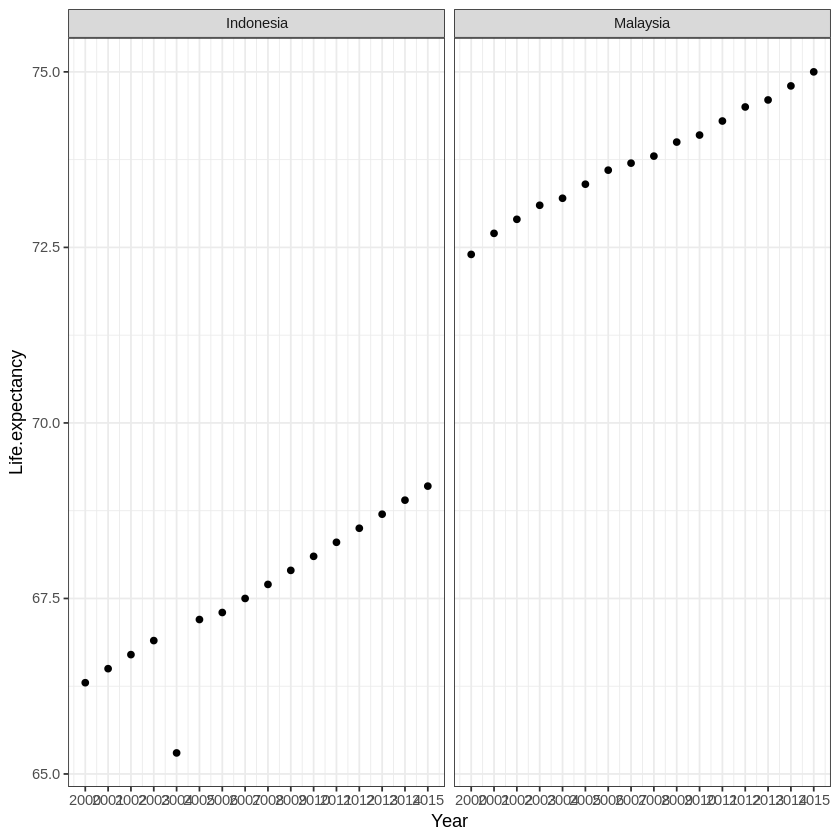

In [ ]:
harapanhidup%>%
  filter(Country %in% c("Indonesia","Malaysia"))%>%
  ggplot(aes(x=Year,y=Life.expectancy))+geom_point()+scale_x_continuous(breaks=seq(2000,2015,1))+
  theme_bw()+
  facet_wrap(~Country)#Memisahkan Negara Indonesia dan Malaysia
# ggplot(aes(x=Year,y=Life.expectancy)) x sebagai Tahun dan y sebagai Harapan Hidup.
#scale_x_continuous(breaks=seq(2000,2015,1)) untuk membagi selang 2000 hingga 2015 dengan selisih 1

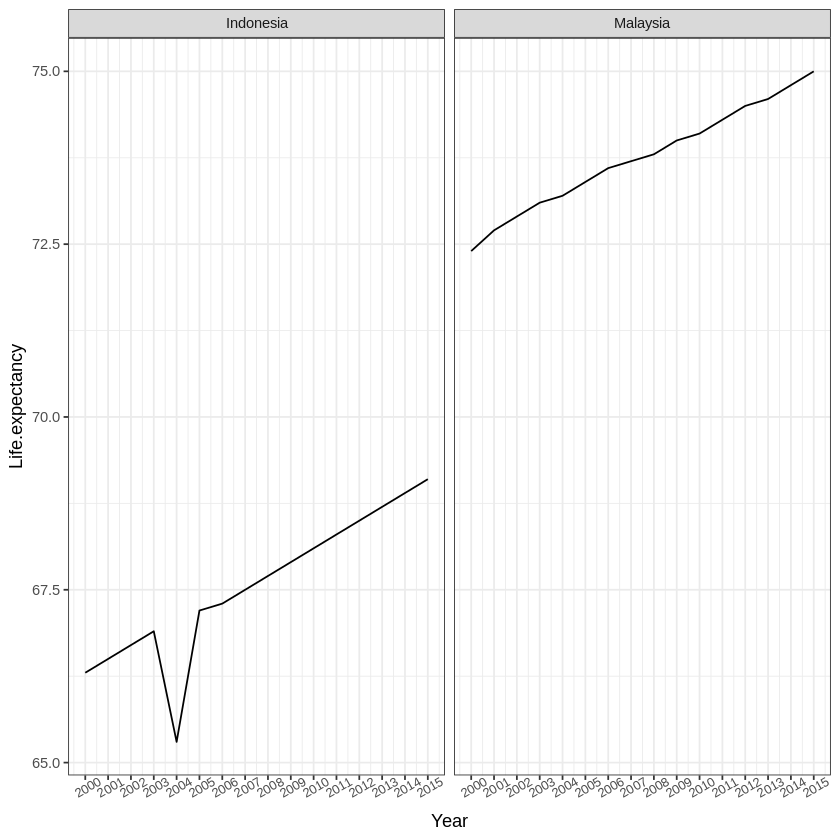

In [ ]:
harapanhidup%>%
  filter(Country %in% c('Indonesia','Malaysia'))%>%
  ggplot(aes(x=Year, y=Life.expectancy))+
  geom_line()+
  scale_x_continuous(breaks = seq(2000,2015,1))+
  theme_bw()+
  theme(axis.text.x  = element_text(angle=30, size=8))+
  facet_wrap(~Country)
#theme(axis.text.x  = element_text(angle=30, size=8)) membuat indeks pada sumbu x menjadi bersudut
#geom_line() membuat kurva garis

Selanjutnya kita beralih ke data Indikator Kesehatan.xlsx dengan atribut sebagai berikut
1. AHH=Angka Harapan Hidup
2. RP=Rasio Puskesmas
3. Rasio Rumah Sakit
4. PHBS=Persentase RT PHBS
5. Persentase RT Sanitasi Layak
6. Persentase Bayi dengan Berat badan lahir rendah
7. Persentase Bayi yang Mendapat Asi Eksklusif
8.Angka Kesakitan Diare (per 1rb penduduk)

In [ ]:

kesehatan<-read.csv('Indikator Kesehatan.csv')#package readxl#
head(kesehatan)

,kota.kab,AHH,RP,RRS,PHBS,SL,BBLR,ASI,DIARE
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,KAB. PACITAN,71.31,1.3011,0.5421,45.7,72.9,6.1,71.2,26.99914
2,KAB. PONOROGO,72.27,1.0691,0.6897,65.0,87.6,4.6,83.1,26.99984
3,KAB. TRENGGALEK,73.15,0.9522,0.1443,39.1,70.7,4.2,70.2,27.00028
4,KAB. TULUNGAGUNG,73.53,0.9313,1.2612,41.6,83.7,3.2,67.1,26.99968
5,KAB. BLITAR,72.99,0.6240,0.6934,49.2,88.2,3.8,88.1,27.00028
6,KAB. KEDIRI,72.25,0.7109,0.6405,54.6,71.6,3.0,76.7,27.00027


Membuat statistika deskriptif dari data

In [ ]:
install.packages("psych")
library(psych)#package ini ada fungs describe(x)#
describe(kesehatan)
summary(kesehatan)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
kota.kab*,1,119,60.000000,34.4963766,60.0000,60.0000000,44.4780000,1.00000,119.00000,118.00000,0.0000000,-1.2302916,3.16227766
AHH,2,119,72.266387,2.7345101,72.4800,72.4148454,2.4314640,64.02000,77.49000,13.47000,-0.5896458,0.4348092,0.25067213
RP,3,119,0.876363,0.4528903,0.8140,0.8289330,0.2455186,0.03970,2.95310,2.91340,1.8742624,5.9115036,0.04151638
RRS,4,119,1.184442,1.1988441,0.8307,0.9517381,0.6382593,0.00000,6.30010,6.30010,2.0893029,4.4306019,0.10989786
PHBS,5,119,63.123571,16.3648961,64.9000,62.8679897,17.7912000,24.20000,100.00000,75.80000,0.1194818,-0.4279834,1.50016757
SL,6,119,76.716303,19.5540578,78.9000,79.2256701,14.5294800,0.00000,100.00000,100.00000,-1.5611407,3.3133472,1.79251754
BBLR,7,119,3.748992,1.6734448,4.0000,3.7834021,1.4826000,0.24000,7.70000,7.46000,-0.2085268,-0.3235247,0.15340444
ASI,8,119,61.969076,18.3285907,65.1000,63.9007216,17.4057240,8.40000,99.70000,91.30000,-0.8861368,0.4579055,1.68017915
DIARE,9,119,24.534082,7.7621668,21.4002,23.6806402,0.2720384,21.05913,99.99957,78.94044,7.8419889,72.4766330,0.71155667


   kota.kab              AHH              RP              RRS        
 Length:119         Min.   :64.02   Min.   :0.0397   Min.   :0.0000  
 Class :character   1st Qu.:70.81   1st Qu.:0.6495   1st Qu.:0.4746  
 Mode  :character   Median :72.48   Median :0.8140   Median :0.8307  
                    Mean   :72.27   Mean   :0.8764   Mean   :1.1844  
                    3rd Qu.:73.94   3rd Qu.:0.9789   3rd Qu.:1.3655  
                    Max.   :77.49   Max.   :2.9531   Max.   :6.3001  
      PHBS              SL              BBLR            ASI       
 Min.   : 24.20   Min.   :  0.00   Min.   :0.240   Min.   : 8.40  
 1st Qu.: 51.05   1st Qu.: 70.35   1st Qu.:2.750   1st Qu.:51.62  
 Median : 64.90   Median : 78.90   Median :4.000   Median :65.10  
 Mean   : 63.12   Mean   : 76.72   Mean   :3.749   Mean   :61.97  
 3rd Qu.: 74.25   3rd Qu.: 89.70   3rd Qu.:4.900   3rd Qu.:75.30  
 Max.   :100.00   Max.   :100.00   Max.   :7.700   Max.   :99.70  
     DIARE       
 Min.   : 21.06  
 1st 

In [ ]:
#Stat Desc untuk kolom 2 sampai dengan 9
describe(kesehatan[,c(2:9)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AHH,1,119,72.266387,2.7345101,72.4800,72.4148454,2.4314640,64.02000,77.49000,13.47000,-0.5896458,0.4348092,0.25067213
RP,2,119,0.876363,0.4528903,0.8140,0.8289330,0.2455186,0.03970,2.95310,2.91340,1.8742624,5.9115036,0.04151638
RRS,3,119,1.184442,1.1988441,0.8307,0.9517381,0.6382593,0.00000,6.30010,6.30010,2.0893029,4.4306019,0.10989786
PHBS,4,119,63.123571,16.3648961,64.9000,62.8679897,17.7912000,24.20000,100.00000,75.80000,0.1194818,-0.4279834,1.50016757
SL,5,119,76.716303,19.5540578,78.9000,79.2256701,14.5294800,0.00000,100.00000,100.00000,-1.5611407,3.3133472,1.79251754
BBLR,6,119,3.748992,1.6734448,4.0000,3.7834021,1.4826000,0.24000,7.70000,7.46000,-0.2085268,-0.3235247,0.15340444
ASI,7,119,61.969076,18.3285907,65.1000,63.9007216,17.4057240,8.40000,99.70000,91.30000,-0.8861368,0.4579055,1.68017915
DIARE,8,119,24.534082,7.7621668,21.4002,23.6806402,0.2720384,21.05913,99.99957,78.94044,7.8419889,72.4766330,0.71155667


# Uji Kenormalan Data dengan Lillie Test
Pada tahap ini, dilakukan uji kenormalan data AHH dengan menggunakan Lilliefors test,

In [ ]:
install.packages("nortest")
library(nortest)
lillie.test(kesehatan$AHH)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Lilliefors (Kolmogorov-Smirnov) normality test

data:  kesehatan$AHH
D = 0.073323, p-value = 0.1206


Perhatikan bahwa
$$H_{0}:\text{data berdist normal}$$
$$H_{1}:\text{data tidak berdistribusi normal}$$
dengan daerah penolakan $H_{0}$ adalah $p< 0.05$, namun berdasarkan hasil uji liliifors diperoleh $p=0.1206>0.05$ yang artinya data terdistribusi normal (gagal tolak $H_{0})$.


	Shapiro-Wilk normality test

data:  kesehatan$AHH
W = 0.97146, p-value = 0.01232


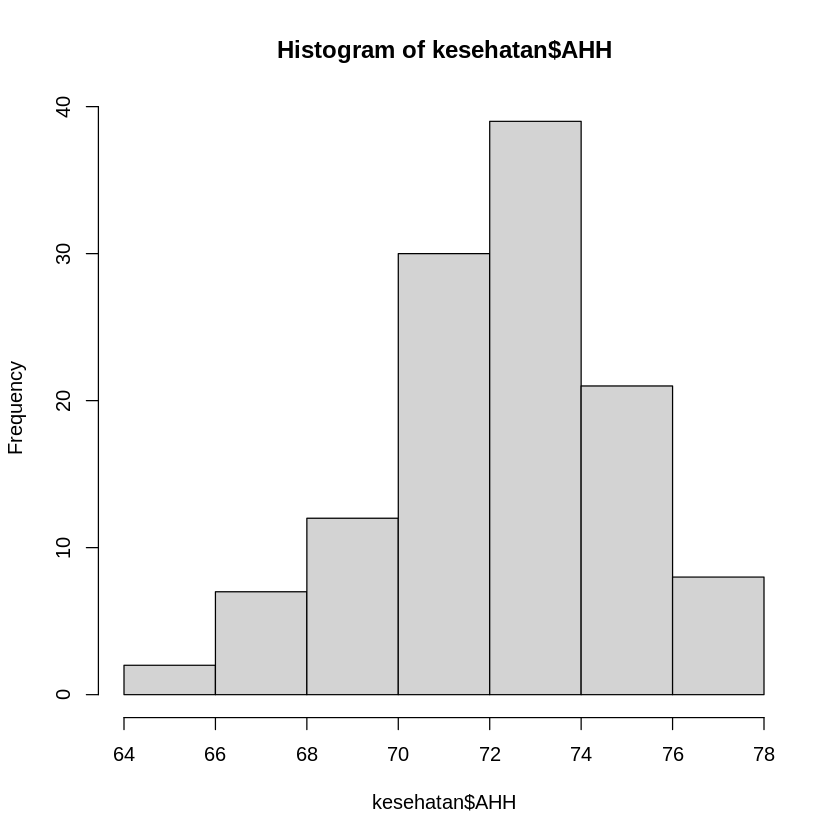

In [ ]:
hist(kesehatan$AHH)
shapiro.test(kesehatan$AHH)

Ini merupakan tes shapiro yang merupakan alternatif dari uji liliefors untuk data yang lebih sedikit. Hasilnya juga menunjukkan bahwa data nya terdistribusi normal.

# Cleaning Data
Perhatikan bahwa data yang berukuran besar yang diambil dari observasi tidak selalu "bersih" terkadang terdapat data yang salah akibat human error atau terjadi suatu fenomena yang tidak biasa. Oleh karena itu, diperlukan analisis lanjutan untuk mengetahui letak letak data outlier. Salah satu cara yang paling lumrah digunakan adalah dengan metode boxplot.


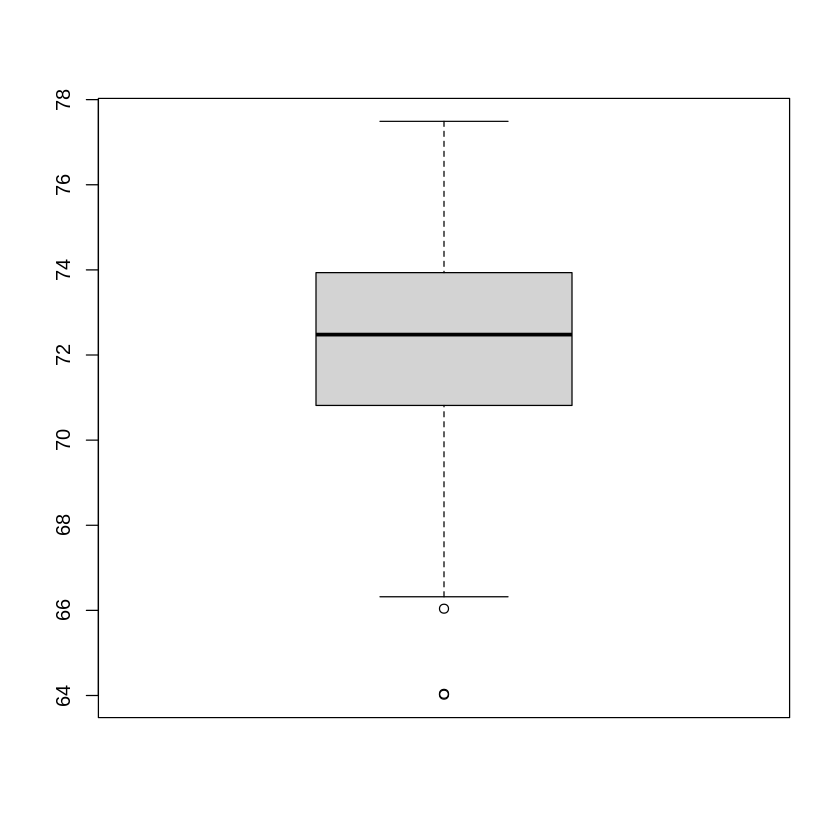

In [ ]:
boxplot(kesehatan$AHH)

Perhatikan bahwa bulat-bulatan kecil menunjukkan posisi data-data yang outlier, oleh karena itu perlu dilakukan cleaning data.

kota.kab,AHH,RP,RRS,PHBS,SL,BBLR,ASI,DIARE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
KAB. PACITAN,71.31,1.3011,0.5421,45.7,72.9,6.1,71.2,26.99914
KAB. PONOROGO,72.27,1.0691,0.6897,65.0,87.6,4.6,83.1,26.99984
KAB. TRENGGALEK,73.15,0.9522,0.1443,39.1,70.7,4.2,70.2,27.00028
KAB. TULUNGAGUNG,73.53,0.9313,1.2612,41.6,83.7,3.2,67.1,26.99968
KAB. BLITAR,72.99,0.6240,0.6934,49.2,88.2,3.8,88.1,27.00028
KAB. KEDIRI,72.25,0.7109,0.6405,54.6,71.6,3.0,76.7,27.00027
KAB. MALANG,72.12,0.4541,0.8927,51.6,76.6,2.7,70.0,26.99996
KAB. LUMAJANG,69.50,0.7234,0.5787,31.8,67.1,4.9,82.9,26.99979
KAB. JEMBER,68.54,0.6172,0.5349,67.8,60.9,6.3,83.7,27.00000


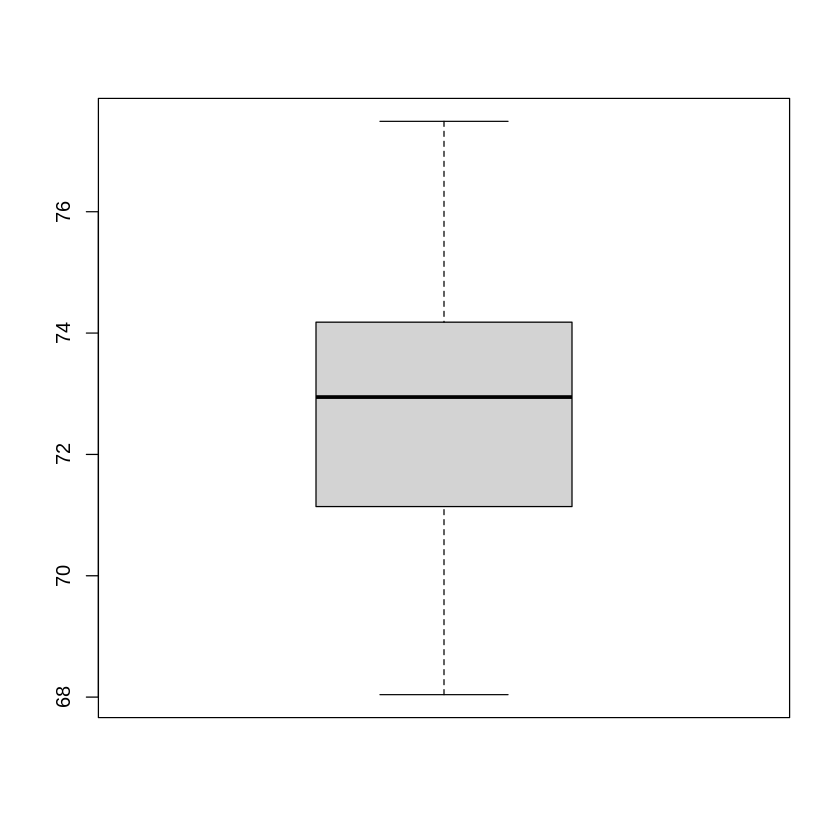

In [ ]:
kesehatanbaru<-kesehatan%>%
  filter(AHH>68)
kesehatanbaru
boxplot(kesehatanbaru$AHH)

Adapun cara lain untuk menghilangkan outlier yaitu dengan menghapus data persentil ke-25


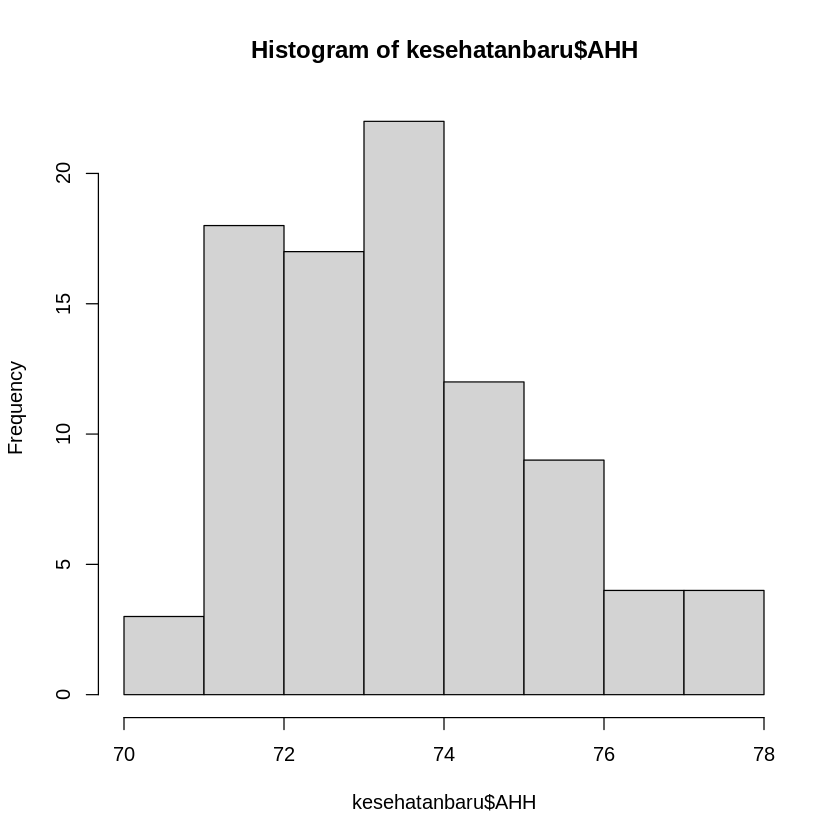

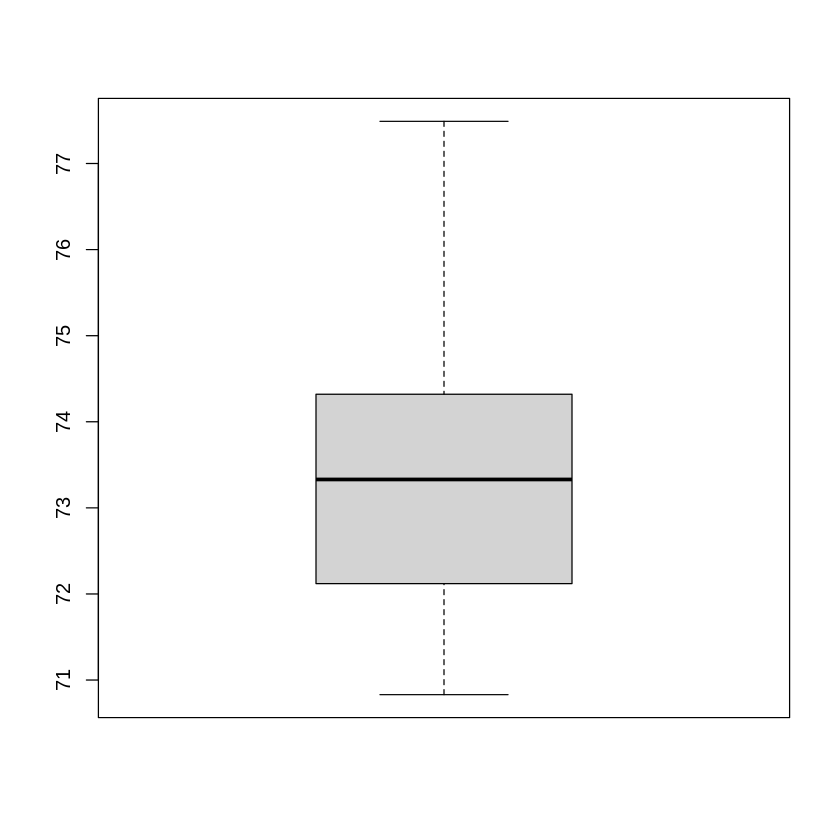

In [ ]:
kesehatanbaru<-kesehatan%>%
  filter(AHH>quantile(kesehatan$AHH,0.25))
hist(kesehatanbaru$AHH)
boxplot(kesehatanbaru$AHH)

# Cek Kenormalan Data RP


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  kesehatan$RP
D = 0.17009, p-value = 5.02e-09


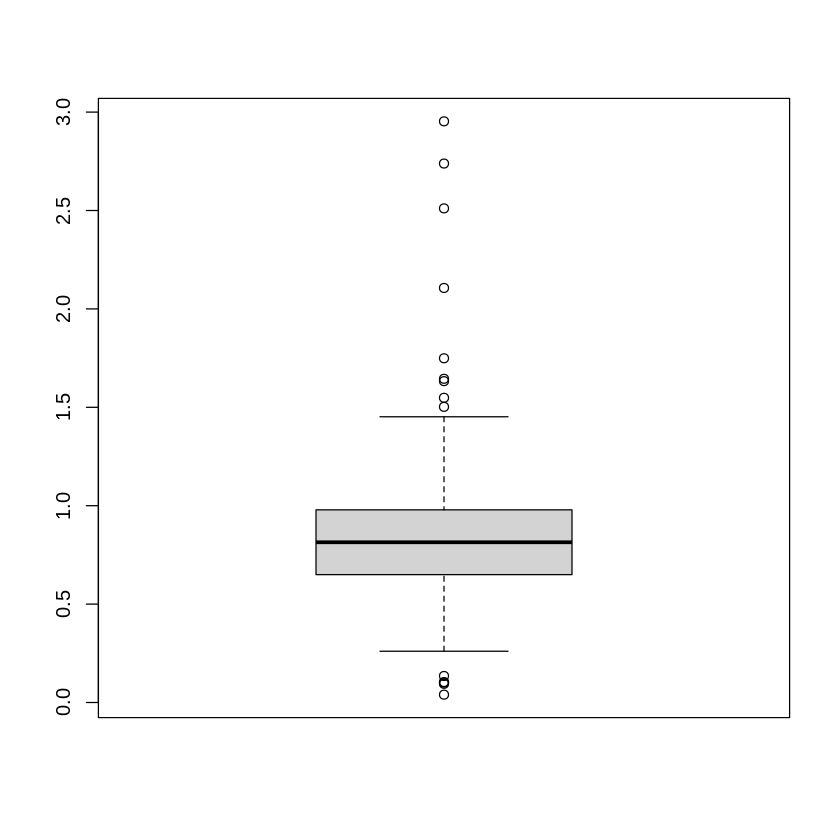

In [ ]:
lillie.test(kesehatan$RP)
boxplot(kesehatan$RP)

tampak bahwa data RP tidak terdistribusi normal dan mengandung banyak sekali outlier. Data-data outlier ini akan dibersihkan dengan menggunakan metode persentil ke-75 dan persentil ke-25.

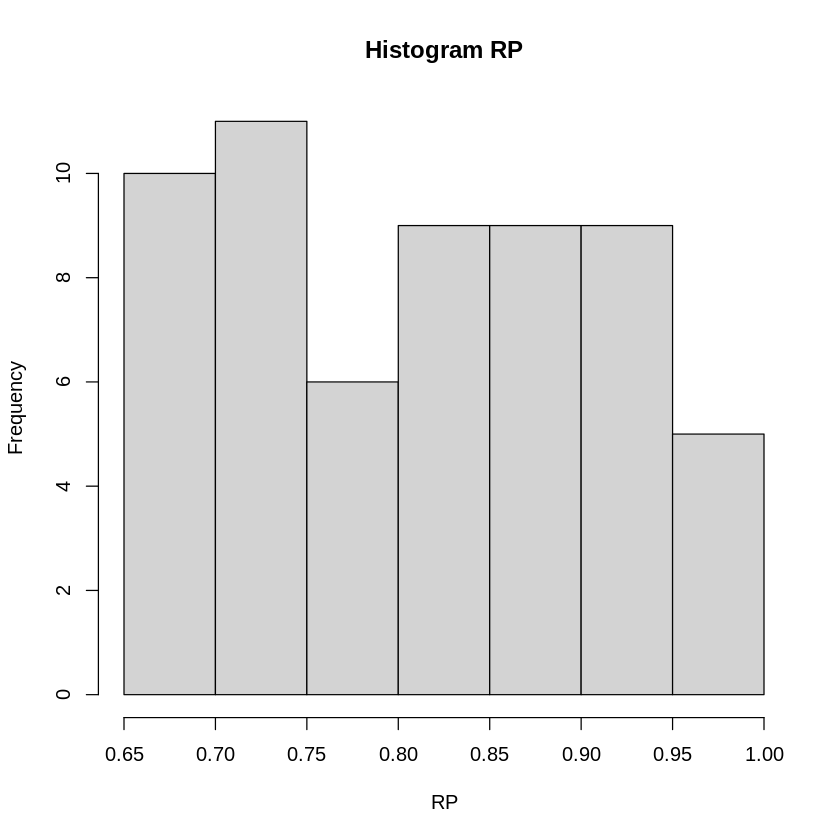

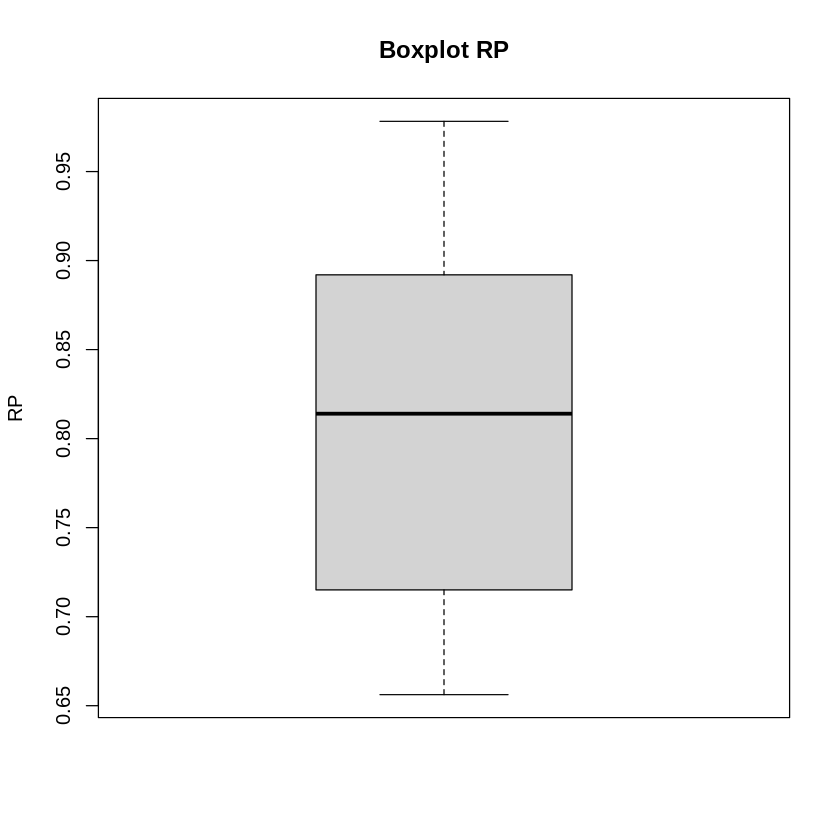

In [ ]:
batasbawah <- quantile(kesehatan$RP, 0.25)
batasatas <- quantile(kesehatan$RP, 0.75)
kesehatanbaru1 <- kesehatan %>%
  filter(RP > batasbawah, RP < batasatas)
hist(kesehatanbaru1$RP, main = "Histogram RP", xlab = "RP")
boxplot(kesehatanbaru1$RP, main = "Boxplot RP", ylab = "RP")

Selanjutnya dilakukan uji kenormalan data, untuk memastikan data yang telah dibersihkan dari outlier terdistribusi normal.

In [ ]:
lillie.test(kesehatanbaru1$RP)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  kesehatanbaru1$RP
D = 0.096748, p-value = 0.1846


Masih belum terdistribusi normal, sehingga perlu dilakukan transformasi data.

In [ ]:
kesehatantrans<-kesehatanbaru1%>%
  mutate(RPtrans=log10(RP))
lillie.test(kesehatantrans$RPtrans)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  kesehatantrans$RPtrans
D = 0.094541, p-value = 0.2113


Selanjutnya dilakukan korelasi dari antar  atribut AHH dan ASI data kesehatan.


In [ ]:
korelasi<-cor.test(kesehatanbaru1$AHH,kesehatanbaru1$ASI, method = 'spearman', exact = F)#untuk yg ga berdist normal
korelasi$statistic
korelasi$estimate
korelasi$p.value

S 
45128.64

rho 
-0.3187796

[1] 0.01386381

Tampak bahwa pval=0.0139< 0.05. Keterangan : yang diterima pvalue< 0.05 adalah H1 nya : rho tidak sama dgn 0(data berkorelasi) , sedangkan pvalue>0.05, yang diterima adalah H0: rho sama dgn 0(data tdk berkorelasi)

# Kurva Korelasi

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



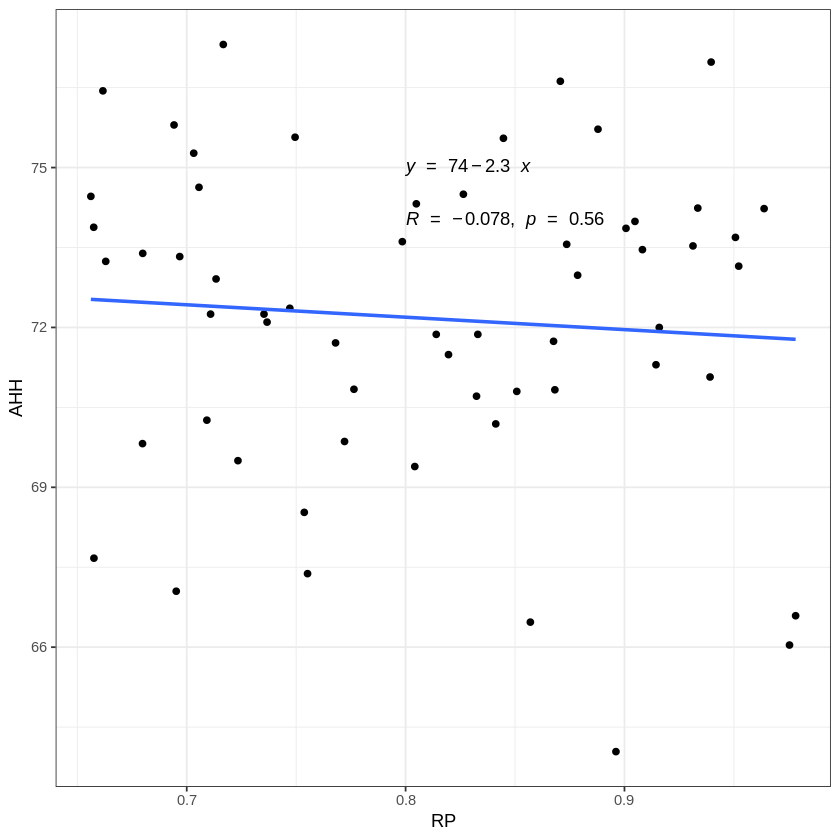

In [ ]:
install.packages("ggplot2")
install.packages("ggpubr")
install.packages("dplyr")

library(ggplot2)
library(ggpubr)
library(dplyr)
kesehatanbaru1%>%
  ggplot(aes(x=RP, y=AHH))+
  geom_point()+
  geom_smooth(method='lm',formula=y~I(x),se=F)+
  stat_regline_equation(formula=y~I(x),aes(label=..eq.label..),label.x=0.8,label.y=75)+
  theme_bw()+
  stat_cor(method='pearson',label.x=0.8,label.y=74)

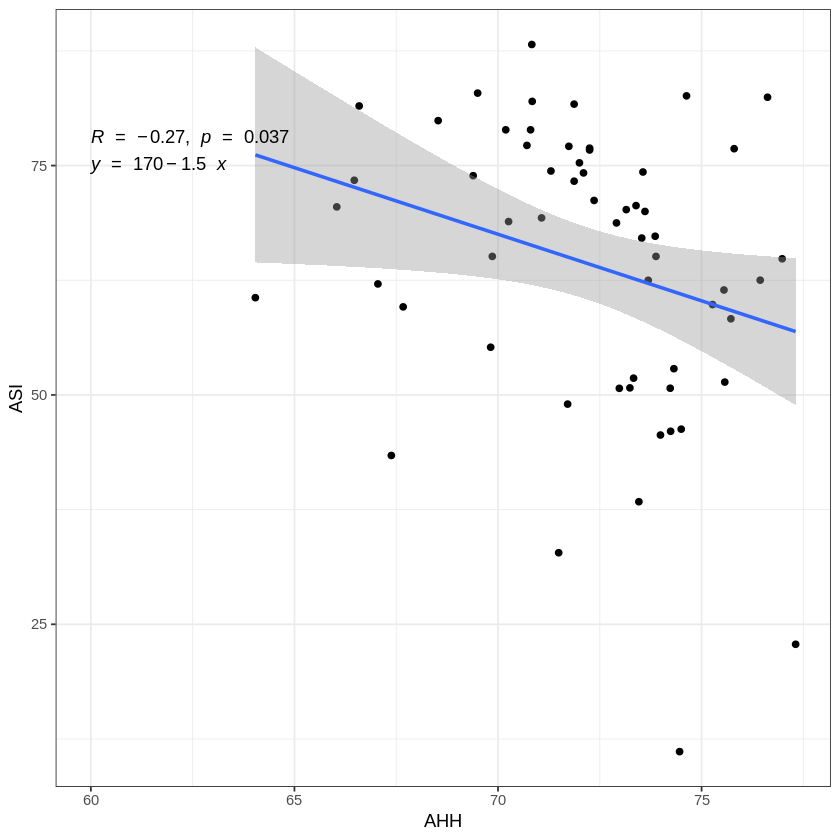

In [ ]:
kesehatanbaru1%>%
  ggplot(aes(x=AHH, y=ASI))+
  geom_point()+
  geom_smooth(method='lm',formula=y~I(x),se=T)+
  stat_regline_equation(formula=y~I(x),aes(label=..eq.label..),label.x=60,label.y=75)+
  theme_bw()+
  stat_cor(method='pearson',label.x=60,label.y=78) #se=F tidak menampilkan confidence interval,se=T mnampilkan interval konfidensi#

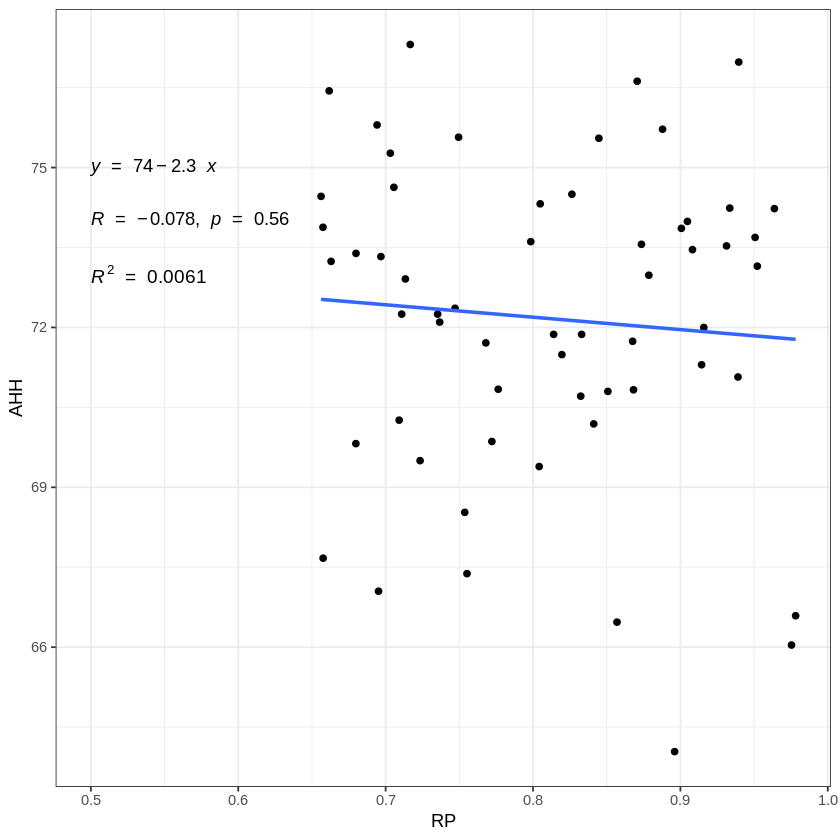

In [ ]:
kesehatanbaru1%>%
  ggplot(aes(x=RP, y=AHH))+
  geom_point()+
  geom_smooth(method='lm',formula=y~I(x),se=F)+
  stat_regline_equation(formula=y~I(x),aes(label=..eq.label..),label.x=0.5,label.y=75)+
  theme_bw()+
  stat_cor(method='pearson',label.x=0.5,label.y=74)+
  stat_regline_equation(formula=y~I(x),aes(label=..rr.label..),size=4,label.x=0.5,label.y=73)

# HEATMAP Korelasi
Pertama akan dihapuskan kolom pertama yang berisi nama kabupaten dari data kesehatan

In [ ]:
kesehatanz<-kesehatanbaru1[,-1]
head(kesehatanz)

,AHH,RP,RRS,PHBS,SL,BBLR,ASI,DIARE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,73.15,0.9522,0.1443,39.1,70.7,4.2,70.2,27.00028
2,73.53,0.9313,1.2612,41.6,83.7,3.2,67.1,26.99968
3,72.25,0.7109,0.6405,54.6,71.6,3.0,76.7,27.00027
4,69.50,0.7234,0.5787,31.8,67.1,4.9,82.9,26.99979
5,70.19,0.8412,0.8723,46.6,83.7,3.1,78.9,26.99986
6,66.04,0.9754,0.3902,34.6,54.0,7.0,70.5,27.00049


Selanjutnya disusun matrik korelasi dari data kesehatanz dengan metode pearson


In [ ]:
korelasi<-cor(kesehatanz,method='pearson')
print(korelasi)

              AHH          RP          RRS        PHBS          SL        BBLR
AHH    1.00000000 -0.07805692  0.330730642  0.58218186  0.60514490  0.11605457
RP    -0.07805692  1.00000000  0.041283315 -0.09768495 -0.14132817  0.22637186
RRS    0.33073064  0.04128331  1.000000000  0.02714858  0.37126519 -0.01842182
PHBS   0.58218186 -0.09768495  0.027148581  1.00000000  0.31246411  0.02055953
SL     0.60514490 -0.14132817  0.371265191  0.31246411  1.00000000  0.12815329
BBLR   0.11605457  0.22637186 -0.018421819  0.02055953  0.12815329  1.00000000
ASI   -0.27276938  0.13709809  0.072324861 -0.44430121 -0.04887609  0.05959553
DIARE -0.60106569  0.15245788  0.003084163 -0.39314386 -0.22958322 -0.04125732
              ASI        DIARE
AHH   -0.27276938 -0.601065692
RP     0.13709809  0.152457882
RRS    0.07232486  0.003084163
PHBS  -0.44430121 -0.393143855
SL    -0.04887609 -0.229583215
BBLR   0.05959553 -0.041257316
ASI    1.00000000  0.382373004
DIARE  0.38237300  1.000000000


Selanjutnya, kita akan membuat matrik korelasi ini bentuk data memanjang ke bawah

In [ ]:
install.packages("reshape2")
library(reshape2)
korelasi.koef<-korelasi%>%
  reshape2::melt(variable.name='parameter',value.name='koef')
head(korelasi.koef)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,Var1,Var2,koef
,<fct>,<fct>,<dbl>
1,AHH,AHH,1.00000000
2,RP,AHH,-0.07805692
3,RRS,AHH,0.33073064
4,PHBS,AHH,0.58218186
5,SL,AHH,0.60514490
6,BBLR,AHH,0.11605457


Selanjutnya, kita mau ambil pvalue dari

In [ ]:
install.packages("Hmisc")
library(Hmisc)
library(reshape2)
library(dplyr)

# Menghitung korelasi dan p-values dengan `rcorr`
cor_result <- rcorr(as.matrix(kesehatanz))  # as.matrix() diperlukan untuk `rcorr`

# Ekstrak p-values dari hasil
korelasi.pvalue <- cor_result$P %>%
  melt(variable.name = 'parameter', value.name = 'pvalue')
korelasi.pvalue

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Var1,Var2,pvalue
<fct>,<fct>,<dbl>
AHH,AHH,NA
RP,AHH,5.567767e-01
RRS,AHH,1.051318e-02
PHBS,AHH,1.320152e-06
SL,AHH,3.836418e-07
BBLR,AHH,3.813988e-01
ASI,AHH,3.660273e-02
DIARE,AHH,4.812166e-07
AHH,RP,5.567767e-01


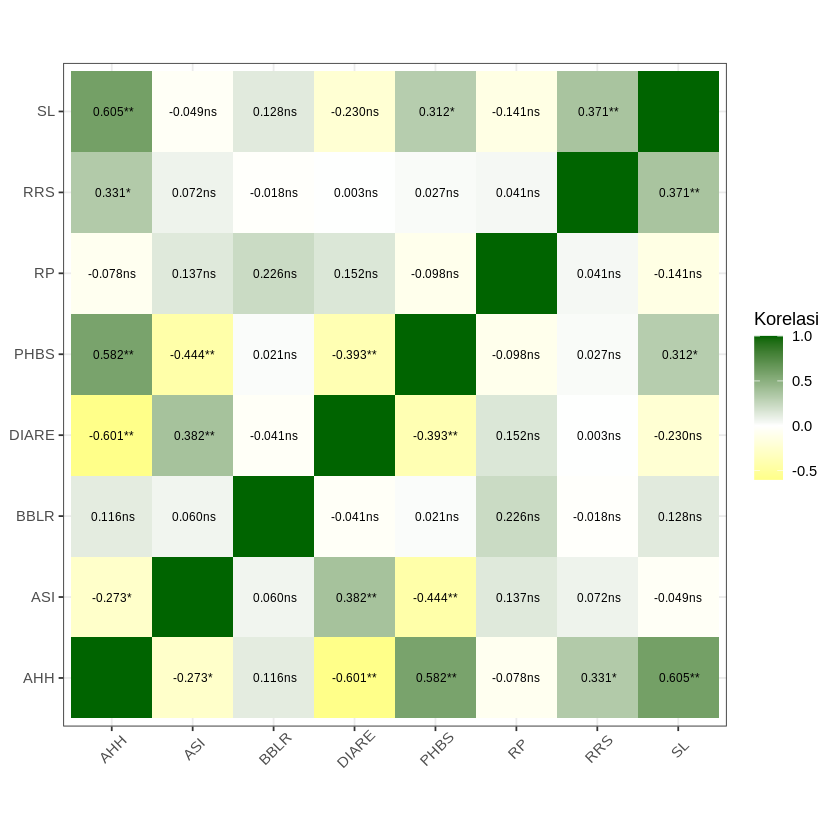

In [ ]:
library(dplyr)
library(ggplot2)
library(reshape2)

#Menjadikan matrik korelasi menjadi memanjang kebawah
korelasi.koef <- korelasi %>%
  reshape2::melt(varnames = c("rowname", "parameter"), value.name = "koef")
#Menjadikan matrik pvalue nya menjadi memanjang kebawah
korelasi.pvalue <- cor_result$P %>%
  reshape2::melt(varnames = c("rowname", "parameter"), value.name = "pvalue")

korelasi.plot <- korelasi.koef %>%
  left_join(korelasi.pvalue, by = c('rowname' = 'rowname', 'parameter' = 'parameter')) %>%
  mutate(tanda = case_when(
    pvalue > 0 & pvalue < 0.01 ~ '**',
    pvalue >= 0.01 & pvalue < 0.05 ~ '*',
    pvalue > 0.05 ~ 'ns',
    TRUE ~ ''
  )) %>%
  mutate(labelnya = ifelse(koef != 1, paste0(format(round(koef, 3), nsmall = 3), tanda), '')) %>%
  distinct(rowname, parameter, .keep_all = TRUE)

# Membuat plot korelasi
ggplot(korelasi.plot, aes(
  x = factor(rowname, level = c('AHH', 'ASI', 'BBLR', 'DIARE', 'PHBS', 'RP', 'RRS', 'SL')),
  y = factor(parameter, level = c('AHH', 'ASI', 'BBLR', 'DIARE', 'PHBS', 'RP', 'RRS', 'SL')),
  fill = koef
)) +
  geom_tile() +
  geom_text(aes(label = labelnya), size = 2.5, color = 'black') +
  scale_fill_gradient2(low = 'yellow', mid = 'white', high = 'dark green') +
  labs(fill = 'Korelasi', x = '', y = '') +
  theme_bw() +
  theme(
    legend.position = 'right',
    axis.title = element_blank(),
    panel.background = element_blank(),
    axis.text.x = element_text(angle = 45, vjust = 0.7)
  ) +
  coord_equal()
